# Forage Virtual Internship - British Airways Data Science Project (Task 1)

---

## Section 1: Web scraping and Loading Dataset

In [1]:
#importing necessary libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews_data = []

for i in range(1, pages + 1):
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Extract reviews, dates, seat types, recommendations, and date flown
    for review_div in parsed_content.find_all("div", {"class": "text_content"}):
        review_text = review_div.get_text(strip=True)
        
        # Extract date if available
        date_itemprop = review_div.find_previous("meta", {"itemprop": "datePublished"})
        date_text = date_itemprop.get("content").strip() if date_itemprop else None

        # Extract seat type if available
        seat_type_header = review_div.find_next("td", {"class": "review-rating-header", "class": "cabin_flown"})
        seat_type_text = seat_type_header.find_next("td").text.strip() if seat_type_header else None

        # Extract recommendation if available
        recommendation_header = review_div.find_next("td", {"class": "review-rating-header", "class": "recommended"})
        recommendation_text = recommendation_header.find_next("td").text.strip() if recommendation_header else None

        # Extract date flown if available
        date_flown_header = review_div.find_next("td", {"class": "review-rating-header", "class": "date_flown"})
        date_flown_text = date_flown_header.find_next("td").text.strip() if date_flown_header else None

        # Append review, date, seat type, recommendation, and date flown to the list
        reviews_data.append({
            'date': date_text,
            'review': review_text,
            'seat_type': seat_type_text,
            'recommendation': recommendation_text,
            'date_flown': date_flown_text
        })

In [3]:
#converting to dataframe
df_new = pd.DataFrame(reviews_data)
df_new.shape

(3716, 5)

In [4]:
#viewing dataset
pd.set_option('display.max_colwidth', None)
df_new.head()

,date,review,seat_type,recommendation,date_flown
0,2023-12-17,"cNot Verified| I had hoped this would be a good review but unfortunately it won’t be. I flew business class from LHR to PDX on the BA nonstop. It was a 787–8 series aircraft. The flight attendant specifically mentioned it was eight years old as he recalled flying it when it was brand new. The business class seats were abysmal. My seat was at the window facing backwards. With the divider down, which had to be in that position for boarding, taxi, takeoff and landing, I was literally just a few feet away from the person in the aisle seat who was facing forward, We both couldn’t help but stare at one another. It couldn’t be avoided. It was horrible. The service wasn’t all that good either. The flight attendant did a pre-dinner drink. When she came back to ask for my choice for dinner, she said none of my selection were left. I was a little upset as nothing else appealed to me. She then came back later, and said the other part of the aircraft had more of the meal selection I wanted. I’m not sure why they didn’t coordinate that to begin with. I was NOT offered any wine or other drink with with dinner. The meal was put down in front of me and the flight attendant never came back other than to clear the tray. Overall, this flight was not very good. I flew over on American and back on BA and paid $6000 round-trip. I’d fly American again. My preferred carrier is United or Lufthansa. I’ll never fly BA again.",Business Class,no,December 2023
1,2023-12-15,"✅Trip Verified| I was going to fly to Frankfurt from Glasgow over London but the flight from London to Frankfurt was cancelled. This meant I had to stay overnight in London where I have no accommodation etc. As I was rebooked to a flight from London City airport which was more than 2h by train I had to get an uber and then take a hotel for £250 in total (London prices). I was reassured over the phone that I would get all the money back. My flight from London city airport was then cancelled again and rebooked to London Heathrow but two days later. I then cancelled that flight and rebooked a new one with Lufthansa as I urgently had to get to work and needed the money. I never received the money back for the hotel, compensation for cancelled flight 1, compensation for cancelled flight 2, the extra food I had to pay for, the uber, or the actual cost of the flight. I was first transferred 3€ by British Airways. They stopped replying to me and told me the issue was ""weather conditions"" although other non-BA flights were going. I lost over £700 in total and never got compensated for the loss of a work day either. It just really feels like they don't care about people. Worst service/airline ever.",Economy Class,no,June 2023
2,2023-12-14,"✅Trip Verified| Much better experience this time around. Flew CPT to LHR on a new A350. Checkin was efficient. I used the Bidvest lounge at CPT as it is better than BA's lounge. Boarding was speedy. The new business class club suites are very good. Slightly irritating to be directed to the wrong seat (1A instead of 1K) which meant that after settling in the passenger in 1A showed up. We arranged a seat switch. Second time in a row it has happened. Why can't BA staff memorise which side of the plane is which and get it right? Captain's announcement was short and on point. Welcome drink was served at the correct temperature i.e. cold (first time ever for me - previously BA has always served the welcome champagne warm). IFE system was good - everything worked as it should. Felt slightly cheap that business class passengers have to pay for wifi. I did not bother. Cocktail was good. The nuts came on a cheap plastic tray which was naff ... other airlines bring out something classier. A female flight attendant came to take my order and I asked for Rooibas panacotta and the chicken breast. She repeated back to me ""so you want a P and a C"". It was such a bizarre thing to say that I misheard. I thought she

In [5]:
df_new.tail()

,date,review,seat_type,recommendation,date_flown
3711,2012-08-29,LHR-HKG on Boeing 747 - 23/08/12. Much has been written about the tired old 747 fleet so I won't go in to that. What was annoying was that I was 4 rows from the front of the World Traveller cabin and by the time the crew had got to my row to serve lunch 1 of the 2 choices had already run out! That in itself would have been ok - it was perfectly acceptable pasta but the starter was a pasta salad. Not very sensible offering 2 dishes almost the same. The crew did what was required of them - serve drinks and food but then we didn't see them again for 9 hours until breakfast was served. I flew home in New Club World (see separate review) and my advice would be to fly in the best cabin you can afford. On a 12 hour flight it really is worthwhile.,Economy Class,no,None
3712,2012-08-28,LHR to HAM. Purser addresses all club passengers by name boarding a little late but left on time. Food good for short flight. Overall excellent.,Business Class,yes,None
3713,2011-10-12,My son who had worked for British Airways urged me to fly British Airways to Kansas City. He recommended me to join the executive club. I went ahead and booked my flight back in May. Very reasonable price. As they are in an alliance with American Airlines my outward journey was with American Airlines. They were helpful even booking my seats to Chicago then onto Kansas at no cost. Problem was on my return. I duly waited to book my seat on the Chicago flight 24 hours prior to check-in. As this was with BA I tried for an hour to choose a seat to no avail. My itinerary came up but told me I was being redirected to American. So I called BA they told me I was to check in at Kansas City before I could have a seat assigned. So I called American a very unhelpful person told me that I had to go to back to BA. I called BA again after explaining I had seat booked with American from Kansas but could not get one with BA she put me on hold for 15 minutes and told me I had a seat - trouble was it was the one from Kansas to Chicago. Perhaps the powers that be can sort this out. It was most frustrating. The journey was fine staff polite in-flight entertainment excellent.,Economy Class,yes,None
3714,2011-10-11,London City-New York JFK via Shannon on A318 but had really nice seats and professional crew. Meal served was very tasty and fresh. Overall a very good flight would use this airline again.,Premium Economy,no,None
3715,2011-10-09,SIN-LHR BA12 B747-436 First Class. Old aircraft (1998) with seats that are not that private but there are only a few of us in the cabin so ok. A bit tatty but I think the planes are being replaced by A380's soon. Seat itself is comfortable enough. Inflight Entertainment awful: fuzzy screen (low resolution LCD screen way passed it's sell-by date) with limited options. Inconveniently has to be pulled around to be seen and put away for t/off and landing. seat comfortable enough for sleeping. Food and service quintessentially English which is the only real reason to fly BA nowadays - the product just doesn't match other airlines. Toilet cramped and awful but it has a window!,First Class,no,None


## Section 2: Data Cleaning

In [6]:
df_new.shape

(3716, 5)

In [7]:
#checking for missing values
df_new = df_new.dropna()
df_new.shape

(2939, 5)

In [8]:
#checking for duplicate values
df_new = df_new.drop_duplicates()
df_new.shape

(2939, 5)

In [ ]:
df.loc[3333, 'review'] = df.loc[3339, 'review'].replace('|', '')

In [9]:
df_new = df_new.reset_index(drop=True)

for i in range(len(df_new)):
    # Check if any string in the 'review' column for the current row contains "|"
    if '|' in df_new.loc[i, 'review']:
        # Split the review column on "| " into two different columns
        split_result = df_new.loc[i, 'review'].split('|', 1)
        df_new.loc[i, ['Verification Status', 'Reviews']] = [split_result[0].strip(), split_result[1].strip()]
    else:
        df_new.loc[i, 'Verification Status'] = pd.NA
        df_new.loc[i, 'Reviews'] = df_new.loc[i, 'review'].strip()

# Drop the original column 'review'
df_new = df_new.drop(columns=['review'])

df_new.head()

,date,seat_type,recommendation,date_flown,Verification Status,Reviews
0,2023-12-17,Business Class,no,December 2023,cNot Verified,"I had hoped this would be a good review but unfortunately it won’t be. I flew business class from LHR to PDX on the BA nonstop. It was a 787–8 series aircraft. The flight attendant specifically mentioned it was eight years old as he recalled flying it when it was brand new. The business class seats were abysmal. My seat was at the window facing backwards. With the divider down, which had to be in that position for boarding, taxi, takeoff and landing, I was literally just a few feet away from the person in the aisle seat who was facing forward, We both couldn’t help but stare at one another. It couldn’t be avoided. It was horrible. The service wasn’t all that good either. The flight attendant did a pre-dinner drink. When she came back to ask for my choice for dinner, she said none of my selection were left. I was a little upset as nothing else appealed to me. She then came back later, and said the other part of the aircraft had more of the meal selection I wanted. I’m not sure why they didn’t coordinate that to begin with. I was NOT offered any wine or other drink with with dinner. The meal was put down in front of me and the flight attendant never came back other than to clear the tray. Overall, this flight was not very good. I flew over on American and back on BA and paid $6000 round-trip. I’d fly American again. My preferred carrier is United or Lufthansa. I’ll never fly BA again."
1,2023-12-15,Economy Class,no,June 2023,✅Trip Verified,"I was going to fly to Frankfurt from Glasgow over London but the flight from London to Frankfurt was cancelled. This meant I had to stay overnight in London where I have no accommodation etc. As I was rebooked to a flight from London City airport which was more than 2h by train I had to get an uber and then take a hotel for £250 in total (London prices). I was reassured over the phone that I would get all the money back. My flight from London city airport was then cancelled again and rebooked to London Heathrow but two days later. I then cancelled that flight and rebooked a new one with Lufthansa as I urgently had to get to work and needed the money. I never received the money back for the hotel, compensation for cancelled flight 1, compensation for cancelled flight 2, the extra food I had to pay for, the uber, or the actual cost of the flight. I was first transferred 3€ by British Airways. They stopped replying to me and told me the issue was ""weather conditions"" although other non-BA flights were going. I lost over £700 in total and never got compensated for the loss of a work day either. It just really feels like they don't care about people. Worst service/airline ever."
2,2023-12-14,Business Class,yes,December 2023,✅Trip Verified,"Much better experience this time around. Flew CPT to LHR on a new A350. Checkin was efficient. I used the Bidvest lounge at CPT as it is better than BA's lounge. Boarding was speedy. The new business class club suites are very good. Slightly irritating to be directed to the wrong seat (1A instead of 1K) which meant that after settling in the passenger in 1A showed up. We arranged a seat switch. Second time in a row it has happened. Why can't BA staff memorise which side of the plane is which and get it right? Captain's announcement was short and on point. Welcome drink was served at the correct temperature i.e. cold (first time ever for me - previously BA has always served the welcome champagne warm). IFE system was good - everything worked as it should. Felt slightly cheap that business class passengers have to pay for wifi. I did not bother. Cocktail was good. The nuts came on a cheap plastic tray which was naff ... other airlines bring out something classier. A female flight attendant came to take my order and I asked for Rooibas panacotta and the chicken breast. She repeated back to me ""so you want a P and a C"". It was such a 

In [10]:
df_new.tail()

,date,seat_type,recommendation,date_flown,Verification Status,Reviews
2934,2015-06-12,Business Class,no,May 2015,<NA>,"Terrible. Flight time is well over 2 hours. Seating is like Ryanair, but we are talking BA Club Europe. Which genius decided that 30 inch is sufficient for premium passengers? No idea what to do with my legs. It's impossible to use my laptop. This is not business class. Very uncomfortable flight, especially for the money I paid. BA - rethink!"
2935,2015-06-12,Economy Class,yes,May 2015,<NA>,"28th May 2015, LHR-DEN, B747, Seat 29A. Paid £55 extra for Legroom seat which was good though the width is very narrow. Lady in seat next to me kept fidgeting And her arm kept twitching into mine the whole flight which was annoying. Flight was on time and cabin crew were all very friendly. Food also was pretty good for economy. 747 is really showing her age now, though the cabin was clean, tidy and in good condition, it was old in style and very noisy. The entertainment system is also quite long in the tooth with a small, blurry, screen. Pretty good flight though."
2936,2015-06-12,Business Class,yes,June 2015,<NA>,"9/6/15, ORD-LHR, 777-300, Club World, Seat 13b. Had booked as World Traveler Plus but was upgraded pretty close to departure. This meant I did not have any time to get a meal before hand and the meal on board was both small and not very good. Would have been better with the economy mean I think. Breakfast was pretty poor as well with\r\nseveral items not given out. Other than that the crew were excellent and very attentive. The seat was full lie flat though pretty narrow I thought compared to other carriers Business class. Entertainment system was also very good and up to date."
2937,2015-06-12,Economy Class,yes,June 2015,<NA>,"10/6/15, LHR-GLA, A321, Seat 9A. Was able to choose this seat in advance which has plenty of legroom as no seat in front. Flight was pretty full. Cabin crew were all extremely friendly and helpful welcoming every passenger individually. Flight was delayed by difficulty in storing the silly amount of carry on baggage people brought on board. Some stuff was obviously way bigger than the allowed size. It took ages to get it all sorted which was ridiculous, however the crew kept smiling though it all. Again new configuration seating which I found pretty comfortable. Drink and snack was served as usual. Landed nearly 30 mins late to discover my baggage had not made it from GRR which was quite annoying. Overall good flight though."
2938,2015-06-12,Economy Class,yes,May 2015,<NA>,"28 May 2015, GLA-LHR. A321 (new Seating) Seat 4A. Flight was on time and about half full. I've read complaints about the new seating however found it to be comfortable and roomy. Drink and snack service was fine and the cabin crew were all very friendly."


In [11]:
df_new['Verification Status'].value_counts()

Verification Status
✅Trip Verified      1167
✅Verified Review     770
Not Verified         229
❎Unverified           20
❎Not Verified          5
cNot Verified          1
Name: count, dtype: int64

In [13]:
value_mapping = {'❎Not Verified': 'Not Verified', '❎Unverified': 'Not Verified', '✅Trip Verified': 'Verified', '✅Verified Review': 'Verified','cNot Verified': 'Not Verified'}

In [14]:
df_new['Verification Status'] = df_new['Verification Status'].replace(value_mapping)
df_new['Verification Status'].value_counts()

Verification Status
Verified        1937
Not Verified     255
Name: count, dtype: int64

## Section 3: Data Preprocessing

In [15]:
import re
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import WordPunctTokenizer

# Download NLTK resources (if not already downloaded)
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/srinidhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/srinidhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# A list of contractions from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [17]:
def text_preprocessing(text):
    
    # Convert words to lower case
    text = text.lower()
    
    # Expand contractions
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
        
    # Format words and remove unwanted characters
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text) 

    # Tokenize each word
    text = nltk.WordPunctTokenizer().tokenize(text)

    # Lemmatize each word
    text = [nltk.stem.WordNetLemmatizer().lemmatize(token, pos='v') for token in text if len(token)>1]
    
    return text

In [18]:
# Convert list to string
def to_string(text):
    text = ' '.join(map(str, text))
    return text

# Create a list of review by applying text_preprocessing function
df_new['Review_CleanList'] = df_new['Reviews'].map(text_preprocessing)

# Return to string with to_string function
df_new['Review_Clean'] = list(map(to_string, df_new['Review_CleanList']))

In [19]:
df_new.sample()

,date,seat_type,recommendation,date_flown,Verification Status,Reviews,Review_CleanList,Review_Clean
431,2022-04-04,Business Class,yes,March 2022,Verified,"Flew back on BA0254 Bridgetown to Heathrow in the old Club Class. A huge disappointment after going out in the new Club Class suites - the end of this awful yin and yang seating can't come soon enough. Even tried to pay BA's extortionate pre-booking rate for our seats - none left to choose even weeks ahead. My wife and I were stuck in the middle 2 seats of 4 - 13E and F. Good job it was an overnighter so we managed to sleep a bit and not have to climb over our neighbours very often. The March film selection so not good. Not particularly friendly FA who insisted face masks must be worn even though BA's policy has changed regarding flying back to a non-mask wearing destination (ie. London). Sort it out BA. Took off 20 minutes late but big tailwind so more than made up the time on a relatively smooth flight. Dinner not to bad but breakfast - fairly dire. My wife's smoked salmon bagel was dreadful. As usual when BA is good, it's really good but when it's bad it's awful. I recommend hesitatingly - come on BA, be great again. We pay a lot for ""premium"" seats.","[fly, back, on, ba0254, bridgetown, to, heathrow, in, the, old, club, class, huge, disappointment, after, go, out, in, the, new, club, class, suit, the, end, of, this, awful, yin, and, yang, seat, cannot, come, soon, enough, even, try, to, pay, ba, extortionate, pre, book, rate, for, our, seat, none, leave, to, choose, even, weeks, ahead, my, wife, and, be, stick, in, the, middle, seat, of, 13e, and, good, job, it, be, an, overnighter, so, we, manage, to, sleep, bite, and, not, have, to, climb, over, our, neighbour, very, often, the, march, film, selection, so, not, good, not, particularly, friendly, fa, ...]",fly back on ba0254 bridgetown to heathrow in the old club class huge disappointment after go out in the new club class suit the end of this awful yin and yang seat cannot come soon enough even try to pay ba extortionate pre book rate for our seat none leave to choose even weeks ahead my wife and be stick in the middle seat of 13e and good job it be an overnighter so we manage to sleep bite and not have to climb over our neighbour very often the march film selection so not good not particularly friendly fa who insist face mask must be wear even though ba policy have change regard fly back to non mask wear destination ie london sort it out ba take off 20 minutes late but big tailwind so more than make up the time on relatively smooth flight dinner not to bad but breakfast fairly dire my wife smoke salmon bagel be dreadful as usual when ba be good it be really good but when it be bad it be awful recommend hesitatingly come on ba be great again we pay lot for premium seat


## Section 3: Most Frequently used Words

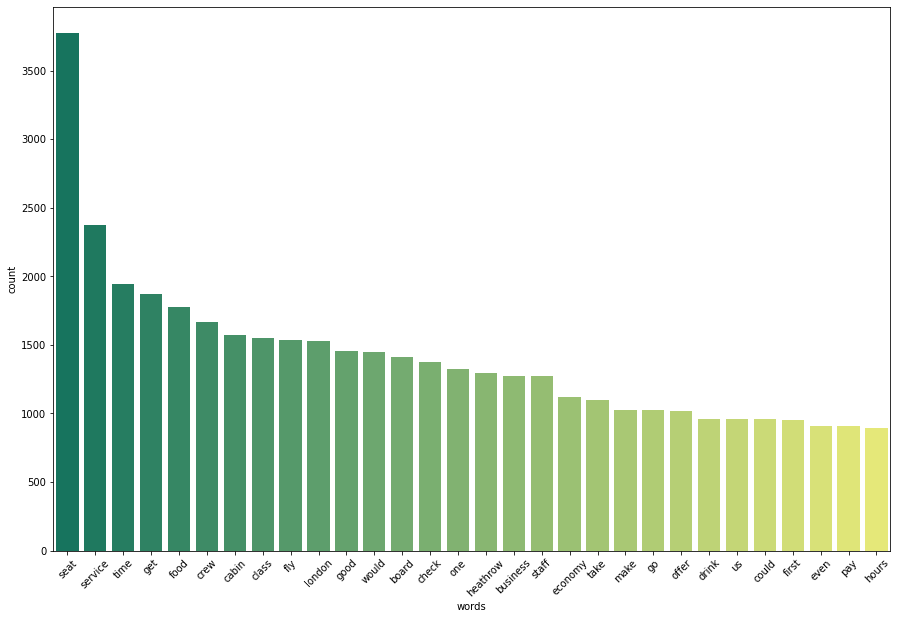

In [26]:
# Import Counter 
from collections import Counter

# Join all word corpus
review_cleanwords = ','.join(list(df_new['Review_Clean'].values))

# Count and find the 30 most frequent
Counter = Counter(review_cleanwords.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig = plt.figure(1, figsize = (15,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'summer')
plt.xticks(rotation=45);

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list.extend(['flight', 'ba','british','airways'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/srinidhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
df_new['Review_CleanList'] = [[word for word in line if word not in stopwords_list] for line in df_new['Review_CleanList']]
df_new['Review_Clean'] = list(map(to_string, df_new['Review_CleanList']))

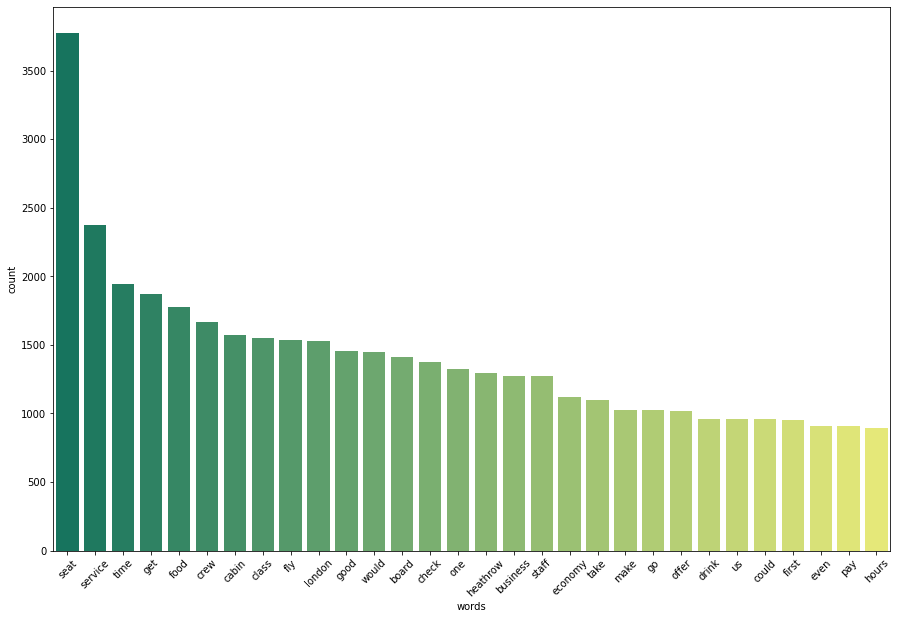

In [25]:
# Import Counter 
from collections import Counter

# Join all word corpus
review_cleanwords = ','.join(list(df_new['Review_Clean'].values))

# Count and find the 30 most frequent
Counter = Counter(review_cleanwords.split())
most_frequent = Counter.most_common(30)

# Bar plot of frequent words
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(1, figsize = (15,10))
_ = pd.DataFrame(most_frequent, columns=("words","count"))
sns.barplot(x = 'words', y = 'count', data = _, palette = 'summer')
plt.xticks(rotation=45);

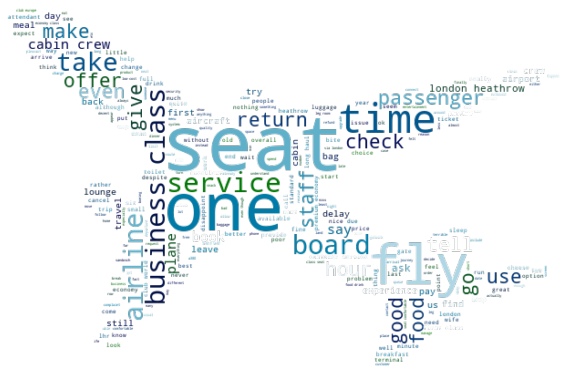

In [86]:
mask = np.array(Image.open("airplane1.png"))

# Ensure that the mask has an alpha channel (RGBA)
if mask.shape[2] == 3:
    # Add an alpha channel (fully opaque)
    alpha_channel = np.ones((mask.shape[0], mask.shape[1], 1), dtype=np.uint8) * 255
    mask = np.concatenate((mask, alpha_channel), axis=2)

# Set fully transparent regions to white
mask[mask[:, :, 3] == 0, :3] = [255, 255, 255]

# Create the WordCloud with the modified mask
wordcloud = WordCloud(background_color=None, mode='RGBA', max_words=3000, mask=mask, colormap='ocean').generate(' '.join(df_new['Review_Clean']))

# Display the WordCloud with a transparent background
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

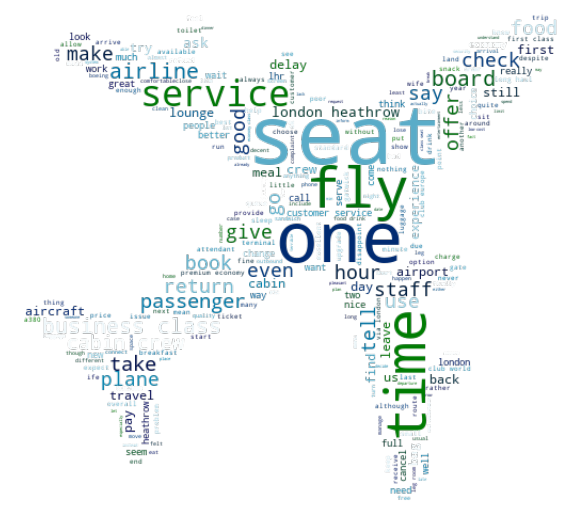

In [88]:
mask = np.array(Image.open("plane2.png"))

# Ensure that the mask has an alpha channel (RGBA)
if mask.shape[2] == 3:
    # Add an alpha channel (fully opaque)
    alpha_channel = np.ones((mask.shape[0], mask.shape[1], 1), dtype=np.uint8) * 255
    mask = np.concatenate((mask, alpha_channel), axis=2)

# Set fully transparent regions to white
mask[mask[:, :, 3] == 0, :3] = [255, 255, 255]

# Create the WordCloud with the modified mask
wordcloud = WordCloud(background_color=None, mode='RGBA', max_words=3000, mask=mask, colormap='ocean').generate(' '.join(df_new['Review_Clean']))

# Display the WordCloud with a transparent background
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Section 4: Topic Modeling

In [89]:
import gensim

# Create Dictionary
id2word = gensim.corpora.Dictionary(df_new['Review_CleanList'])

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in df_new['Review_CleanList']]

<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

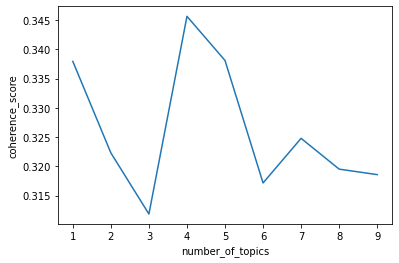

In [96]:
from gensim.models import CoherenceModel

import random
random.seed(42)

# Convert 'Review_CleanList' to a list of lists
texts = df_new['Review_CleanList'].tolist()

# Compute coherence score
number_of_topics = []
coherence_score = []

for i in range(1, 10):
    lda_model = gensim.models.ldamodel.LdaModel(
        corpus=corpus,
        id2word=id2word,
        iterations=50,
        num_topics=i
    )

    coherence_model_lda = CoherenceModel(
        model=lda_model,
        texts=texts,
        dictionary=id2word,
        coherence='c_v'
    )

    coherence_lda = coherence_model_lda.get_coherence()

    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({
    'number_of_topics': number_of_topics,
    'coherence_score': coherence_score
})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

In [99]:
# Run the LDA model
random.seed(42)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

In [101]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} Word: {}".format(idx, topic))

Topic: 0 Word: 0.047*"seat" + 0.019*"cabin" + 0.017*"food" + 0.017*"crew" + 0.015*"good" + 0.013*"service" + 0.012*"fly" + 0.012*"economy" + 0.010*"time" + 0.009*"drink"
Topic: 1 Word: 0.033*"book" + 0.024*"try" + 0.022*"call" + 0.021*"travel" + 0.017*"could" + 0.017*"wait" + 0.016*"tell" + 0.016*"ticket" + 0.015*"customer" + 0.011*"pay"
Topic: 2 Word: 0.017*"get" + 0.015*"check" + 0.012*"would" + 0.012*"delay" + 0.012*"go" + 0.011*"staff" + 0.011*"time" + 0.010*"service" + 0.009*"hours" + 0.009*"bag"
Topic: 3 Word: 0.046*"class" + 0.039*"business" + 0.027*"club" + 0.025*"lounge" + 0.023*"first" + 0.022*"excellent" + 0.015*"europe" + 0.014*"world" + 0.008*"product" + 0.008*"room"


In [ ]:
Topic: 0 Word: 0.047*"seat" + 0.019*"cabin" + 0.017*"food" + 0.017*"crew" + 0.015*"good" + 0.013*"service" + 0.012*"fly" + 0.012*"economy" + 0.010*"time" + 0.009*"drink"
Topic: 1 Word: 0.033*"book" + 0.024*"try" + 0.022*"call" + 0.021*"travel" + 0.017*"could" + 0.017*"wait" + 0.016*"tell" + 0.016*"ticket" + 0.015*"customer" + 0.011*"pay"
Topic: 2 Word: 0.017*"get" + 0.015*"check" + 0.012*"would" + 0.012*"delay" + 0.012*"go" + 0.011*"staff" + 0.011*"time" + 0.010*"service" + 0.009*"hours" + 0.009*"bag"
Topic: 3 Word: 0.046*"class" + 0.039*"business" + 0.027*"club" + 0.025*"lounge" + 0.023*"first" + 0.022*"excellent" + 0.015*"europe" + 0.014*"world" + 0.008*"product" + 0.008*"room"

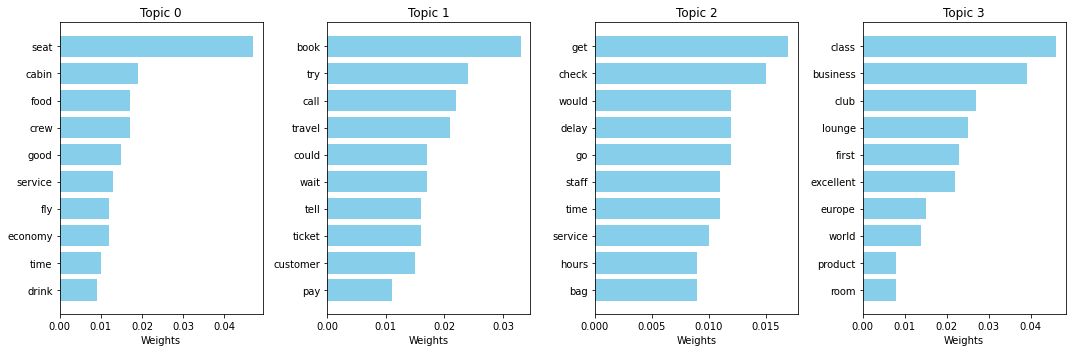

In [102]:
topics = [
    
    '0.047*"seat" + 0.019*"cabin" + 0.017*"food" + 0.017*"crew" + 0.015*"good" + 0.013*"service" + 0.012*"fly" + 0.012*"economy" + 0.010*"time" + 0.009*"drink"',
    '0.033*"book" + 0.024*"try" + 0.022*"call" + 0.021*"travel" + 0.017*"could" + 0.017*"wait" + 0.016*"tell" + 0.016*"ticket" + 0.015*"customer" + 0.011*"pay"',
    '0.017*"get" + 0.015*"check" + 0.012*"would" + 0.012*"delay" + 0.012*"go" + 0.011*"staff" + 0.011*"time" + 0.010*"service" + 0.009*"hours" + 0.009*"bag"',
    '0.046*"class" + 0.039*"business" + 0.027*"club" + 0.025*"lounge" + 0.023*"first" + 0.022*"excellent" + 0.015*"europe" + 0.014*"world" + 0.008*"product" + 0.008*"room"']

# Function to extract words and weights from the topic string
def extract_words_weights(topic_str):
    parts = topic_str.split(" + ")
    words = [part.split("*")[1][1:-1] for part in parts]
    weights = [float(part.split("*")[0]) for part in parts]
    return words, weights

# Create bar charts for each topic
num_topics = len(topics)

fig, axes = plt.subplots(nrows=1, ncols=num_topics, figsize=(15, 5), sharey=False)

for i in range(num_topics):
    words, weights = extract_words_weights(topics[i])
    y_pos = np.arange(len(words))

    axes[i].barh(y_pos, weights, align='center', color='skyblue')
    axes[i].set_yticks(y_pos)
    axes[i].set_yticklabels(words)
    axes[i].invert_yaxis()
    axes[i].set_xlabel('Weights')
    axes[i].set_title(f'Topic {i}')

plt.tight_layout()
plt.show()

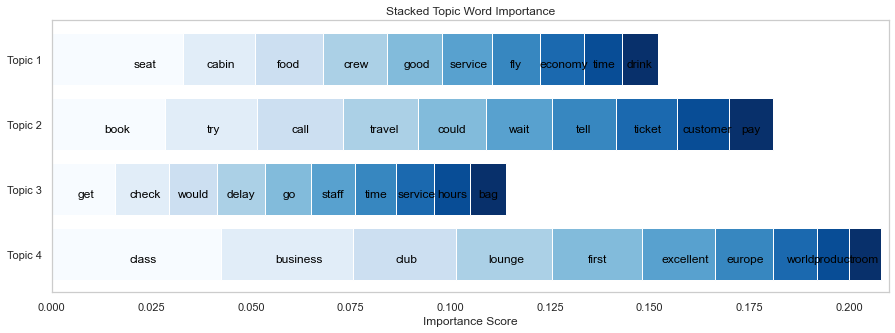

In [260]:
# Extract words and importance scores for each topic
topic_words = []
topic_scores = []

for topic in topics:
    words_scores = [item.split('*') for item in topic.split(' + ')]
    words = [word_score[1].strip('"') for word_score in words_scores]
    scores = [float(word_score[0]) for word_score in words_scores]
    topic_words.append(words)
    topic_scores.append(scores)

# Create a stacked horizontal bar graph
fig, ax = plt.subplots(figsize=(15, 5))

# Plot each topic as a stacked bar
for i, (words, scores) in enumerate(zip(topic_words, topic_scores)):
    color = plt.cm.Blues(np.linspace(0, 1, len(words)))  # Use a colormap for different colors within each bar
    cumulative_sums = np.cumsum(scores) - np.array(scores) / 2  # Calculate cumulative sums

    # Reset cumulative sum for each topic
    cumulative_sums -= cumulative_sums[0]

    # Loop through each word and plot the corresponding bar
    for j, (word, score, cumulative_sum) in enumerate(zip(words, scores, cumulative_sums)):
        bars = ax.barh(i, score, height=0.8, color=color[j], left=cumulative_sum)

        # Label the words just above each bar
        ax.text(cumulative_sum + score / 2, i, word,
                ha='center', va='top', color='black', fontsize=12)

# Configure the plot
ax.set_yticks(range(len(topic_words)))
ax.set_yticklabels([f'Topic {i+1}' for i in range(len(topic_words))])
ax.set_xlabel('Importance Score')
ax.set_title('Stacked Topic Word Importance')
ax.invert_yaxis()  # Invert y-axis for better visualization
ax.set_xlim(0, 0.21)

plt.grid(False)
plt.show()

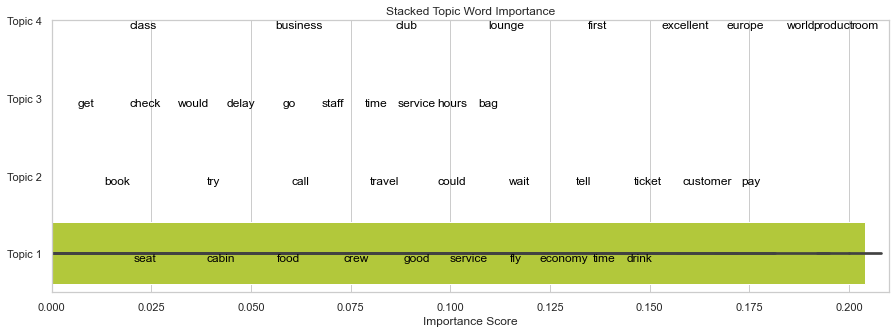

In [241]:
# Extract words and importance scores for each topic
topic_words = []
topic_scores = []

for topic in topics:
    words_scores = [item.split('*') for item in topic.split(' + ')]
    words = [word_score[1].strip('"') for word_score in words_scores]
    scores = [float(word_score[0]) for word_score in words_scores]
    topic_words.append(words)
    topic_scores.append(scores)

# Set Seaborn style
sns.set(style='whitegrid')

# Create a stacked horizontal bar graph
fig, ax = plt.subplots(figsize=(15, 5))

# Plot each topic as a stacked bar
for i, (words, scores) in enumerate(zip(topic_words, topic_scores)):
    color = sns.color_palette('viridis', len(words))  # Use Seaborn color palette
    cumulative_sums = np.cumsum(scores) - np.array(scores) / 2  # Calculate cumulative sums

    # Reset cumulative sum for each topic
    cumulative_sums -= cumulative_sums[0]

    # Loop through each word and plot the corresponding bar
    for j, (word, score, cumulative_sum) in enumerate(zip(words, scores, cumulative_sums)):
        bars = sns.barplot(x=[cumulative_sum, cumulative_sum + score], y=[i, i],
                           color=color[j], orient='horizontal', ax=ax)

        # Label the words just above each bar
        ax.text(cumulative_sum + score / 2, i, word,
                ha='center', va='top', color='black', fontsize=12)

# Configure the plot
ax.set_yticks(range(len(topic_words)))
ax.set_yticklabels([f'Topic {i+1}' for i in range(len(topic_words))])
ax.set_xlabel('Importance Score')
ax.set_title('Stacked Topic Word Importance')
ax.invert_yaxis()  # Invert y-axis for better visualization
ax.set_xlim(0, 0.21)

plt.show()

## Section 5: Sentiment Analysis

In [242]:
from textblob import TextBlob

# empty list to store polarity score
polarity_score = []

# to loop through all rows and run TextBlob on each of the reviews
for i in range (len(df_new)):
    temp_blob = TextBlob(df_new['Reviews'][i])
    
    # obtain polarity score of this tweet and store in polarity_score list
    if temp_blob.sentiment.polarity > 0:
        polarity_score.append('Positive')
        
    elif temp_blob.sentiment.polarity < 0:
        polarity_score.append('Negative')
        
    else:
        polarity_score.append('Neutral')
    
# create polarity_score column 
df_new['Polarity_Score'] = polarity_score

In [243]:
df_new.head()

,date,seat_type,recommendation,date_flown,Verification Status,Reviews,Review_CleanList,Review_Clean,Polarity_Score
0,2023-12-17,Business Class,no,December 2023,Not Verified,"I had hoped this would be a good review but unfortunately it won’t be. I flew business class from LHR to PDX on the BA nonstop. It was a 787–8 series aircraft. The flight attendant specifically mentioned it was eight years old as he recalled flying it when it was brand new. The business class seats were abysmal. My seat was at the window facing backwards. With the divider down, which had to be in that position for boarding, taxi, takeoff and landing, I was literally just a few feet away from the person in the aisle seat who was facing forward, We both couldn’t help but stare at one another. It couldn’t be avoided. It was horrible. The service wasn’t all that good either. The flight attendant did a pre-dinner drink. When she came back to ask for my choice for dinner, she said none of my selection were left. I was a little upset as nothing else appealed to me. She then came back later, and said the other part of the aircraft had more of the meal selection I wanted. I’m not sure why they didn’t coordinate that to begin with. I was NOT offered any wine or other drink with with dinner. The meal was put down in front of me and the flight attendant never came back other than to clear the tray. Overall, this flight was not very good. I flew over on American and back on BA and paid $6000 round-trip. I’d fly American again. My preferred carrier is United or Lufthansa. I’ll never fly BA again.","[hop, would, good, review, unfortunately, win, fly, business, class, lhr, pdx, nonstop, 787, series, aircraft, attendant, specifically, mention, eight, years, old, recall, fly, brand, new, business, class, seat, abysmal, seat, window, face, backwards, divider, position, board, taxi, takeoff, land, literally, feet, away, person, aisle, seat, face, forward, help, stare, one, another, avoid, horrible, service, good, either, attendant, pre, dinner, drink, come, back, ask, choice, dinner, say, none, selection, leave, little, upset, nothing, else, appeal, come, back, later, say, part, aircraft, meal, selection, want, sure, coordinate, begin, offer, wine, drink, dinner, meal, put, front, attendant, never, come, back, clear, tray, overall, ...]",hop would good review unfortunately win fly business class lhr pdx nonstop 787 series aircraft attendant specifically mention eight years old recall fly brand new business class seat abysmal seat window face backwards divider position board taxi takeoff land literally feet away person aisle seat face forward help stare one another avoid horrible service good either attendant pre dinner drink come back ask choice dinner say none selection leave little upset nothing else appeal come back later say part aircraft meal selection want sure coordinate begin offer wine drink dinner meal put front attendant never come back clear tray overall good fly american back pay 6000 round trip fly american prefer carrier unite lufthansa never fly,Positive
1,2023-12-15,Economy Class,no,June 2023,Verified,"I was going to fly to Frankfurt from Glasgow over London but the flight from London to Frankfurt was cancelled. This meant I had to stay overnight in London where I have no accommodation etc. As I was rebooked to a flight from London City airport which was more than 2h by train I had to get an uber and then take a hotel for £250 in total (London prices). I was reassured over the phone that I would get all the money back. My flight from London city airport was then cancelled again and rebooked to London Heathrow but two days later. I then cancelled that flight and rebooked a new one with Lufthansa as I urgently had to get to work and needed the money. I never received the money back for the hotel, compensation for cancelled flight 1, compensation for cancelled flight 2, the extra food I had to pay for, the uber, or the actual cost of the flight. I was first tran

In [244]:
polarity_counts = df_new['Polarity_Score'].value_counts()
polarity_counts

Polarity_Score
Positive    1994
Negative     930
Neutral       15
Name: count, dtype: int64

In [250]:
df_new['seat_type'].value_counts()

seat_type
Economy Class      1602
Business Class      902
Premium Economy     277
First Class         158
Name: count, dtype: int64

<Axes: xlabel='Polarity_Score', ylabel='count'>

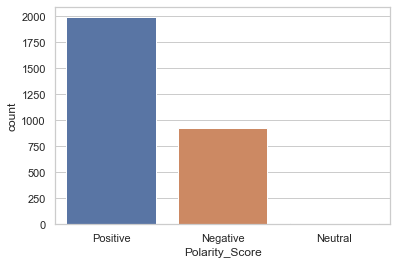

In [246]:
import seaborn as sns

sns.countplot(x='Polarity_Score', data=df_new)

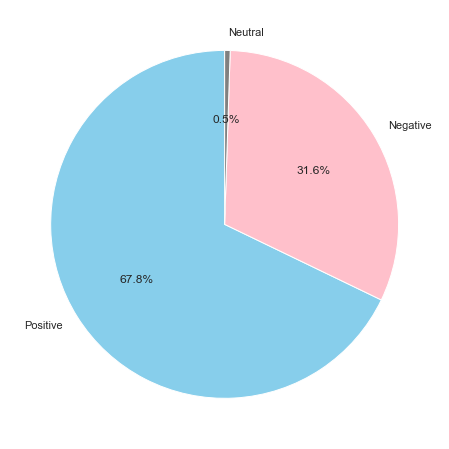

In [247]:
# Create a pie chart
plt.figure(figsize=(8, 8), facecolor='white') 
plt.pie(polarity_counts, labels=polarity_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink', 'gray'])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


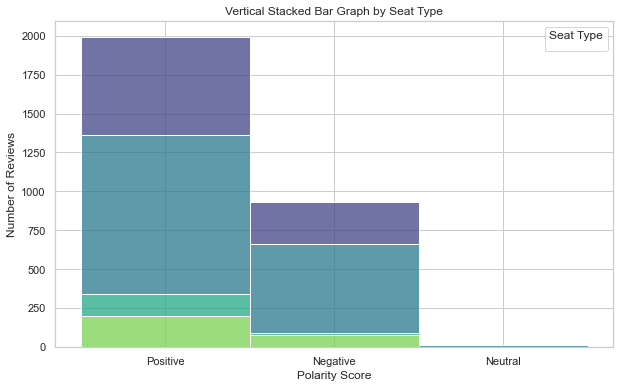

In [249]:
# Create a vertical stacked bar graph
plt.figure(figsize=(10, 6))
sns.histplot(data=df_new, x='Polarity_Score', hue='seat_type', multiple='stack', palette='viridis', bins=20)

# Configure the plot
plt.title('Vertical Stacked Bar Graph by Seat Type')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Reviews')
plt.legend(title='Seat Type', loc='upper right')

plt.show()

In [252]:
train_pos = df_new[ df_new['Polarity_Score'] == 'Positive']
train_pos = train_pos['Review_Clean']

train_neg = df_new[ df_new['Polarity_Score'] == 'Negative']
train_neg = train_neg['Review_Clean']

In [253]:
from PIL import Image

def wordCloud_generator(data, color, color_map):
    
    wave_mask = np.array(Image.open('plane1.png'))
    
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color =color,
                          min_font_size = 12,
                          colormap= color_map,
                          mask = wave_mask,
                          contour_width=5
                         ).generate(' '.join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis('off')
    
    plt.show() 

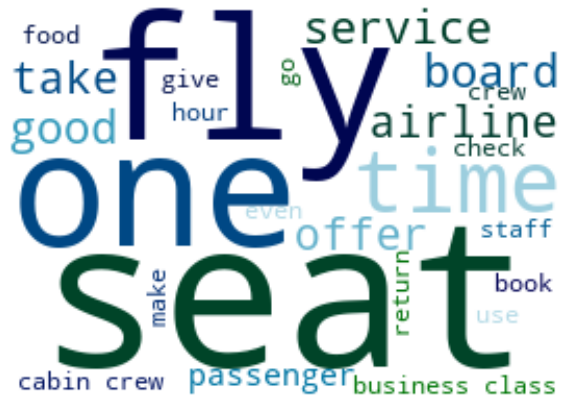

In [254]:
# WordCloud for Positive Review
wordCloud_generator(train_pos, 'white', 'ocean')

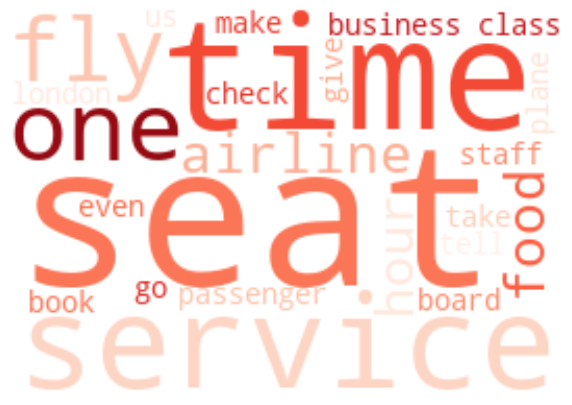

In [255]:
# Wordcloud for Negative Review
wordCloud_generator(train_neg, 'white', 'Reds')

In [256]:
df_new.to_csv('britishairways.csv', index=False)

## Section 6: Text Summarization

In [ ]:
from nltk.cluster.util import cosine_distance
import networkx as nx
import numpy as np

def sentence_similarity(sent1, sent2, stopwords=None):
    if stopwords is None:
        stopwords = []

    sent1 = [word.lower() for word in sent1]
    sent2 = [word.lower() for word in sent2]

    all_words = list(set(sent1 + sent2))

    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)

    for word in sent1:
        if word not in stopwords:
            vector1[all_words.index(word)] += 1

    for word in sent2:
        if word not in stopwords:
            vector2[all_words.index(word)] += 1

    return 1 - cosine_distance(vector1, vector2)

def build_similarity_matrix(sentences, stopwords=None):
    if stopwords is None:
        stopwords = []

    similarity_matrix = np.zeros((len(sentences), len(sentences)))

    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i != j:
                similarity_matrix[i][j] = sentence_similarity(sentences[i], sentences[j], stopwords)

    return similarity_matrix

def generate_summary(reviews_column, top_n=1):
    stop_words = stopwords.words("english")

    # Tokenize each review into sentences
    reviews_sentences = [nltk.sent_tokenize(review) for review in reviews_column]

    # Flatten the list of sentences
    sentences = [sent for review_sents in reviews_sentences for sent in review_sents]

    sentence_similarity_matrix = build_similarity_matrix(sentences, stop_words)

    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)

    ranked_sentences = sorted(((scores[i], sent) for i, sent in enumerate(sentences)), reverse=True)

    summary = [ranked_sentence[1] for ranked_sentence in ranked_sentences[:top_n]]

    return summary

# Perform text summarization on the 'Reviews' column
summary = generate_summary(df['Reviews'], top_n=1)

# Print the summary
for sentence in summary:
    print(sentence)